# Exploring Elections
## by James Mitchell

## Preliminary Wrangling

> Most of the below is a combination of economic, demographic, and religiosity data. It will be loaded in below with the point of looking at which one of these factors have most influenced election results from 2008, 2012, or 2016. After exploring the available data it will be a matter of deciding what is useable and what is not. As part of the wrangling phase I will need to merge the dataframes. These are each gathered from the following sources:  
> https://www.bea.gov/data/gdp/gdp-county

> https://github.com/ryanschaub/US-Census-Demographic-Data

> http://www.thearda.com/Archive/Files/Codebooks/RCMSCY10_CB.asp

> https://github.com/tonmcg/US_County_Level_Election_Results_08-16/blob/master/US_County_Level_Presidential_Results_08-16.csv#L1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline
import statsmodels.api as sm


> Most of the below is a combination of economic, demographic, and religiosity data. It will be loaded in below with the point of looking at which one of these factors have most influenced election results from 2008, 2012, or 2016. After exploring the available data it will be a matter of deciding what is useable and what is not. 

In [2]:
County_GDP_data = pd.read_excel('County GDP Data.xlsx')
Religious_data = pd.read_excel('US_Religious_Data.xlsx')
County_Economic_Demographic_data = pd.read_csv('Econ_Demo_data.csv')
Election_Results08_12_16 = pd.read_excel('Election Results.xlsx')

In [3]:
County_GDP_data.head()

,FIPS,Postal,2012 GDP,2013 GDP,2014 GDP,2015 GDP
0,1001,AL,1383941,1363368,1402516,1539406
1,1003,AL,5599194,6365080,6547396,6436107
2,1005,AL,639833,701750,689212,743779
3,1007,AL,297560,325906,329087,322307
4,1009,AL,632761,701145,688525,819608


In [4]:
Religious_data.head()

,Total Number of Adherents,FIPS
0,36938.0,1001
1,96918.0,1003
2,15101.0,1005
3,11430.0,1007
4,37352.0,1009


In [5]:
County_Economic_Demographic_data.head()

,FIPS,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Unemployment
0,1001,55221,26745,28476,2.6,75.8,18.5,0.4,1.0,0.0,...,51281.0,24974,12.9,18.6,33.2,17.0,24.2,8.6,17.1,7.6
1,1003,195121,95314,99807,4.5,83.1,9.5,0.6,0.7,0.0,...,50254.0,27317,13.4,19.2,33.1,17.7,27.1,10.8,11.2,7.5
2,1005,26932,14497,12435,4.6,46.2,46.7,0.2,0.4,0.0,...,32964.0,16824,26.7,45.3,26.8,16.1,23.1,10.8,23.1,17.6
3,1007,22604,12073,10531,2.2,74.5,21.4,0.4,0.1,0.0,...,38678.0,18431,16.8,27.9,21.5,17.9,17.8,19.0,23.7,8.3
4,1009,57710,28512,29198,8.6,87.9,1.5,0.3,0.1,0.0,...,45813.0,20532,16.7,27.2,28.5,14.1,23.9,13.5,19.9,7.7


In [6]:
Election_Results08_12_16.head()

,fips_code,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
NaN,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
NaN,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
NaN,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
NaN,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
NaN,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196


In [7]:
##Need to change the fips code variable to match the other variables so the dataframes can be merged
Election_Results08_12_16 = Election_Results08_12_16.rename(columns = {'fips_code' : 'FIPS'})

In [8]:
Election_Results08_12_16.head()

,FIPS,county,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,oth_2012,total_2016,dem_2016,gop_2016,oth_2016
NaN,26041,Delta County,19064,9974,8763,327,18043,8330,9533,180,18467,6431,11112,924
NaN,48295,Lipscomb County,1256,155,1093,8,1168,119,1044,5,1322,135,1159,28
NaN,1127,Walker County,28652,7420,20722,510,28497,6551,21633,313,29243,4486,24208,549
NaN,48389,Reeves County,3077,1606,1445,26,2867,1649,1185,33,3184,1659,1417,108
NaN,56017,Hot Springs County,2546,619,1834,93,2495,523,1894,78,2535,400,1939,196


In [9]:
Election_Results08_12_16.dtypes

FIPS           int64
county        object
total_2008     int64
dem_2008       int64
gop_2008       int64
oth_2008       int64
total_2012     int64
dem_2012       int64
gop_2012       int64
oth_2012       int64
total_2016     int64
dem_2016       int64
gop_2016       int64
oth_2016       int64
dtype: object

In [10]:
County_Economic_Demographic_data.dtypes

FIPS              int64
TotalPop          int64
Men               int64
Women             int64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Citizen           int64
Income          float64
IncomePerCap      int64
Poverty         float64
ChildPoverty    float64
Professional    float64
Service         float64
Office          float64
Construction    float64
Production      float64
Unemployment    float64
dtype: object

In [11]:
Analysis_File = pd.merge(left=County_GDP_data, right=Election_Results08_12_16, left_on='FIPS', right_on='FIPS', how='inner')
Analysis_File = pd.merge(left=Analysis_File, right=County_Economic_Demographic_data, left_on='FIPS', right_on='FIPS', how='inner')
Analysis_File = pd.merge(left=Analysis_File, right=Religious_data, left_on='FIPS', right_on='FIPS', how='inner')
Analysis_File.shape

(3059, 40)

In [12]:
Analysis_File.head()

,FIPS,Postal,2012 GDP,2013 GDP,2014 GDP,2015 GDP,county,total_2008,dem_2008,gop_2008,...,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Unemployment,Total Number of Adherents
0,1001,AL,1383941,1363368,1402516,1539406,Autauga County,23641,6093,17403,...,24974,12.9,18.6,33.2,17.0,24.2,8.6,17.1,7.6,36938.0
1,1003,AL,5599194,6365080,6547396,6436107,Baldwin County,81413,19386,61271,...,27317,13.4,19.2,33.1,17.7,27.1,10.8,11.2,7.5,96918.0
2,1005,AL,639833,701750,689212,743779,Barbour County,11630,5697,5866,...,16824,26.7,45.3,26.8,16.1,23.1,10.8,23.1,17.6,15101.0
3,1007,AL,297560,325906,329087,322307,Bibb County,8644,2299,6262,...,18431,16.8,27.9,21.5,17.9,17.8,19.0,23.7,8.3,11430.0
4,1009,AL,632761,701145,688525,819608,Blount County,24267,3522,20389,...,20532,16.7,27.2,28.5,14.1,23.9,13.5,19.9,7.7,37352.0


In [13]:
Analysis_File.dtypes

FIPS                           int64
Postal                        object
2012 GDP                       int64
2013 GDP                       int64
2014 GDP                       int64
2015 GDP                       int64
county                        object
total_2008                     int64
dem_2008                       int64
gop_2008                       int64
oth_2008                       int64
total_2012                     int64
dem_2012                       int64
gop_2012                       int64
oth_2012                       int64
total_2016                     int64
dem_2016                       int64
gop_2016                       int64
oth_2016                       int64
TotalPop                       int64
Men                            int64
Women                          int64
Hispanic                     float64
White                        float64
Black                        float64
Native                       float64
Asian                        float64
P

In [14]:
Analysis_File.isnull().any()

FIPS                         False
Postal                       False
2012 GDP                     False
2013 GDP                     False
2014 GDP                     False
2015 GDP                     False
county                       False
total_2008                   False
dem_2008                     False
gop_2008                     False
oth_2008                     False
total_2012                   False
dem_2012                     False
gop_2012                     False
oth_2012                     False
total_2016                   False
dem_2016                     False
gop_2016                     False
oth_2016                     False
TotalPop                     False
Men                          False
Women                        False
Hispanic                     False
White                        False
Black                        False
Native                       False
Asian                        False
Pacific                      False
Citizen             

In [15]:
Analysis_File.isnull().sum()

FIPS                         0
Postal                       0
2012 GDP                     0
2013 GDP                     0
2014 GDP                     0
2015 GDP                     0
county                       0
total_2008                   0
dem_2008                     0
gop_2008                     0
oth_2008                     0
total_2012                   0
dem_2012                     0
gop_2012                     0
oth_2012                     0
total_2016                   0
dem_2016                     0
gop_2016                     0
oth_2016                     0
TotalPop                     0
Men                          0
Women                        0
Hispanic                     0
White                        0
Black                        0
Native                       0
Asian                        0
Pacific                      0
Citizen                      0
Income                       1
IncomePerCap                 0
Poverty                      0
ChildPov

In [16]:
Analysis_File.dropna(inplace=True)

In [17]:
Analysis_File.duplicated().any()

False

In [18]:
Analysis_File['total_2012'].describe()

count    3.058000e+03
mean     3.970446e+04
std      1.062238e+05
min      1.450000e+02
25%      4.749000e+03
50%      1.071600e+04
75%      2.762100e+04
max      2.427869e+06
Name: total_2012, dtype: float64

In [19]:
Analysis_File['dem_2012'].describe()

count    3.058000e+03
mean     2.008705e+04
std      6.638695e+04
min      5.000000e+00
25%      1.519250e+03
50%      3.925500e+03
75%      1.108775e+04
max      1.672164e+06
Name: dem_2012, dtype: float64

In [20]:
Analysis_File['gop_2012'].describe()

count      3058.000000
mean      18988.521583
std       41957.952710
min          83.000000
25%        2892.750000
50%        6410.000000
75%       15933.500000
max      699600.000000
Name: gop_2012, dtype: float64

### What is the structure of your dataset?

> There are 3049 observations in this dataframe with 40 different columns. Primarily split between economic, demographic, religious, and election data. 

### What is/are the main feature(s) of interest in your dataset?

> I am the most interested in the most influential variables on vote totals as represented by  the dem_2016, gop_2016, oth_2016, and equivalent variables for 08 and 2012. However due to the data that is available and time constraints much of this testing will focus on 2012. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My expectation is that the most likely driver will be the GDP variables, followed by demographic make up. From this it will be important to drill down into  which specific variables are the best drivers for voting totals. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


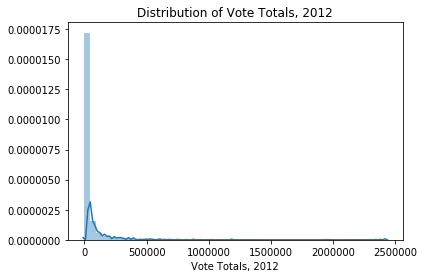

In [21]:
#This appears to be heavily Right skewed. This variable will require a transformation, but it points to the fact that 
#barring several outliers the majority of American Counties have vote totals falling within the 100, 000 range
sb.distplot(Analysis_File['total_2012'])
plt.title('Distribution of Vote Totals, 2012')
plt.xlabel('Vote Totals, 2012')
plt.show();

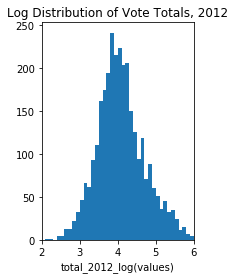

In [22]:
# Log transformation of the value of interest.
plt.subplot(1, 2, 2)
log_data = np.log10(Analysis_File['total_2012']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlim(2, 6)
plt.title('Log Distribution of Vote Totals, 2012')
plt.xlabel('total_2012_log(values)');

This will need to be transformed for further analysis as mentioned in the smaller notes near it. I will transform it for Bivariate analysis

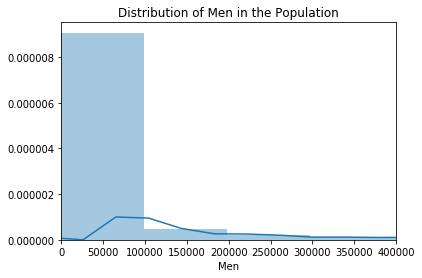

In [23]:
sb.distplot(Analysis_File['Men'])
plt.title('Distribution of Men in the Population')
plt.xlabel('Men')
plt.xlim(0, 400000);

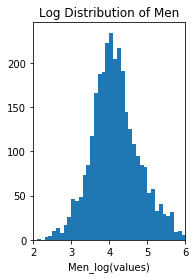

In [24]:
#The skew on this will be present for Women as well, so now we should check Income Per Capita, following the log 
#transformation
plt.subplot(1, 2, 2)
log_data = np.log10(Analysis_File['Men']) 
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlim(2, 6)
plt.title('Log Distribution of Men')
plt.xlabel('Men_log(values)');

This will need to be transformed for further analysis as mentioned in the smaller notes near it. I will transform it for Bivariate analysis, if need be. As things stand now I am not wholly convinced it tells us much of anything meaninful with the data we have now.

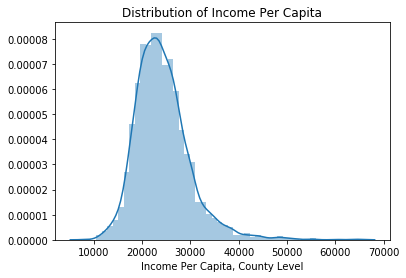

In [25]:
sb.distplot(Analysis_File['IncomePerCap'])
plt.xlabel('Income Per Capita, County Level')
plt.title('Distribution of Income Per Capita');

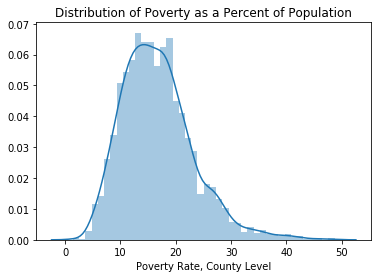

In [26]:
sb.distplot(Analysis_File['Poverty'])
plt.xlabel('Poverty Rate, County Level')
plt.title('Distribution of Poverty as a Percent of Population');

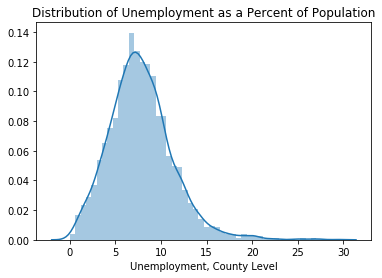

In [27]:
sb.distplot(Analysis_File['Unemployment'])
plt.xlabel('Unemployment, County Level')
plt.title('Distribution of Unemployment as a Percent of Population');

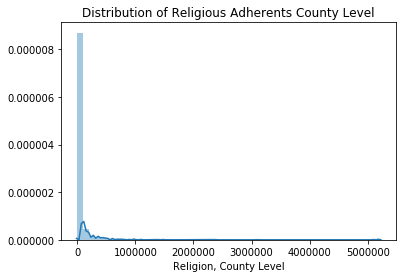

In [28]:
sb.distplot(Analysis_File['Total Number of Adherents'])
plt.xlabel('Religion, County Level')
plt.title('Distribution of Religious Adherents County Level');

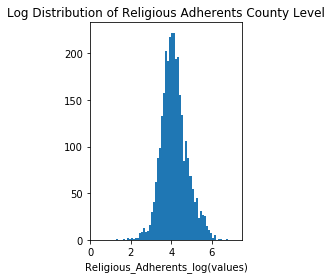

In [29]:
#The skew on this matched what we saw previously, suggesting the number of religious adherents is right skewed. Check the 
#Log
plt.subplot(1, 2, 2)
log_data = np.log10(Analysis_File['Total Number of Adherents']) 
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlim(0, 7.5)
plt.xlabel('Religious_Adherents_log(values)')
plt.title('Log Distribution of Religious Adherents County Level');

Before analysis with regression I will transform this to be a percentage of the population. I want to see what that will do to the distribution as well asnd how that falls. 

In [30]:
Analysis_File['Religiousity'] = (Analysis_File['Total Number of Adherents']/Analysis_File['TotalPop'])*100
Analysis_File['Religiousity'].head()

0    66.891219
1    49.670717
2    56.070845
3    50.566271
4    64.723618
Name: Religiousity, dtype: float64

In [31]:
Analysis_File['Religiousity'].describe()

count    3058.000000
mean       51.359223
std        17.912699
min         2.103418
25%        38.322174
50%        49.585674
75%        62.402253
max       151.858407
Name: Religiousity, dtype: float64

Several counties of outliers, likealy a as a result of erroneous data. I will change these values to match a hundred

In [32]:
Analysis_File.loc[(Analysis_File['Religiousity'] >= 100), 'Religiousity'] = 100

I converted counties that had >100% as the value to 100% as I wanted to keep them in the dataframe for anlysis. 

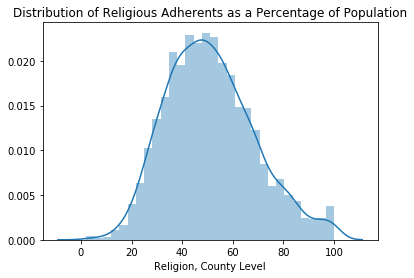

In [33]:
sb.distplot(Analysis_File['Religiousity'])
plt.xlabel('Religion, County Level')
plt.title('Distribution of Religious Adherents as a Percentage of Population');

This normalized it, excellent. No need to take the log. 

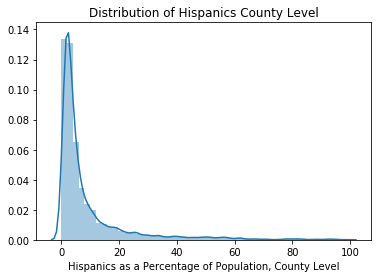

In [34]:
sb.distplot(Analysis_File['Hispanic'])
plt.xlabel('Hispanics as a Percentage of Population, County Level')
plt.title('Distribution of Hispanics County Level');

This distribution matches what we would expect

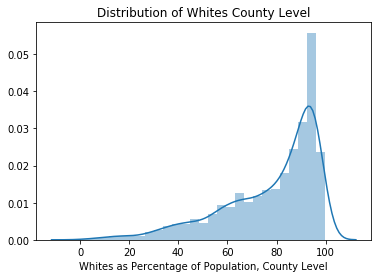

In [35]:
sb.distplot(Analysis_File['White'])
plt.xlabel('Whites as Percentage of Population, County Level')
plt.title('Distribution of Whites County Level');

In [36]:
Analysis_File['White'].mean()

77.7290385873121

This distribution matches what we would expect. The mean points to a left tailed distribution.

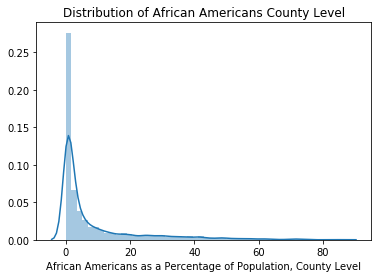

In [37]:
sb.distplot(Analysis_File['Black'])
plt.xlabel('African Americans as a Percentage of Population, County Level')
plt.title('Distribution of African Americans County Level');

This distribution matches what we would expect.

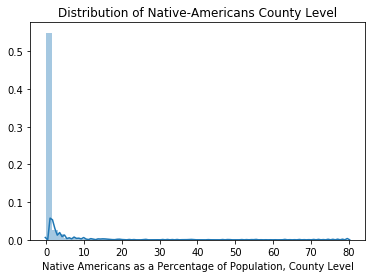

In [38]:
sb.distplot(Analysis_File['Native'])
plt.xlabel('Native Americans as a Percentage of Population, County Level')
plt.title('Distribution of Native-Americans County Level');

This distribution matches what we would expect.

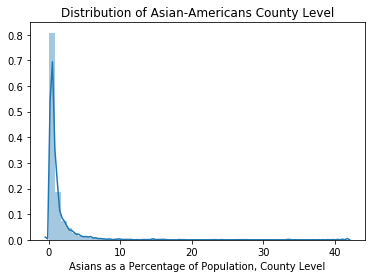

In [39]:
sb.distplot(Analysis_File['Asian'])
plt.xlabel('Asians as a Percentage of Population, County Level')
plt.title('Distribution of Asian-Americans County Level');

This distribution matches what we would expect.

In [ ]:
sb.distplot(Analysis_File['Pacific'])
plt.xlabel('Pacific Islander as a Percentage of Population, County Level')
plt.title('Distribution of Pacific Islanders County Level');

This distribution matches what we would expect.

In [ ]:
sb.distplot(Analysis_File['2012 GDP'])
plt.xlabel('GDP 2012, County Level')
plt.title('Distribution of GDP County Level, 2012')
plt.show();

In [ ]:
plt.figure(3)
sb.distplot(Analysis_File['gop_2012'])
plt.xlabel('GOP Votes 2012, County Level')
plt.title('Distribution of GOP Vote Totals, 2012')
plt.show();

In [ ]:
plt.figure(4)
sb.distplot(Analysis_File['dem_2012'])
plt.xlabel('DNC Votes 2012, County Level')
plt.title('Distribution of DNC Vote Totals, 2012')
plt.show();

In [ ]:
Analysis_File['Percent of Vote (2012), GOP'] = (Analysis_File['gop_2012']/Analysis_File['total_2012'])*100
Analysis_File['Percent of Vote (2012), DNC'] = (Analysis_File['dem_2012']/Analysis_File['total_2012'])*100
Analysis_File['Percent of Vote (2012), DNC'].head()

In [ ]:
plt.figure(1)
sb.distplot(Analysis_File['gop_2012'])
plt.xlabel('GOP Votes 2012, County Level')
plt.title('Distribution of GOP Vote Totals, 2012')

plt.figure(2)
sb.distplot(Analysis_File['dem_2012'])
plt.xlabel('DNC Votes 2012, County Level')
plt.title('Distribution of DNC Vote Totals, 2012')

plt.figure(3)
sb.distplot(Analysis_File['Percent of Vote (2012), GOP'])
plt.xlabel('GOP Votes 2012, County Level')
plt.title('Percent Vote Distribution of GOP Vote Totals, 2012')

plt.figure(4)
sb.distplot(Analysis_File['Percent of Vote (2012), DNC'])
plt.xlabel('DNC Votes 2012, County Level')
plt.title('Percent Vote Distribution of DNC Vote Totals, 2012')

plt.show();

After a quick analysis and transformation this appears to show that the GOP got a higher percentage of the vote in more counties than the DNC. This implies that the GOP likely captured more counties, but as we know lost the election.
It will require a deeper analysis in the Bivariate section to properly demonstrate this phenomenon. 

In [46]:
#Now Im going to create one more descriptor variable for analysis
Analysis_File['Per_Citizen'] = (Analysis_File['Citizen']/Analysis_File['TotalPop'])*100
Analysis_File['Per_Citizen'].head()

0    73.749117
1    75.694057
2    76.912223
3    77.397806
4    73.375498
Name: Per_Citizen, dtype: float64

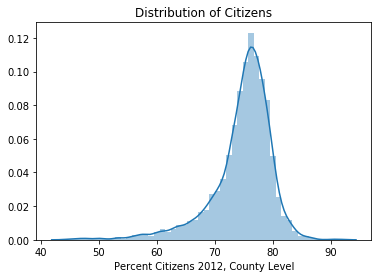

In [47]:
sb.distplot(Analysis_File['Per_Citizen'])
plt.xlabel('Percent Citizens 2012, County Level')
plt.title('Distribution of Citizens')
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The most interesting distribution had to do with the GOP vote percentages and the DNC vote percentages and their specific distribution. To avoid regurgitation it will lead to follow om Bivariate analysis to confirm, visually what was suspected. Secondly my transformation variables are Religiousity, a Log GDP value, Percent vote share for GOP and DNC, and a Percentage-Citizen value. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As mentioned previously I did transform GDP by the use of log as well as convert several other variables to percentages to normalize them. In the case of Religiousity I had to adjust the values to account for errors from the polling results. I also previously checked for Null values as well as duplicates. I am also going to exclude Men and Women as variables as I believe they will be highly correlated with every other variable in the future Regression Analysis and are somewhat outside what I would like to do. That being said I still intend to visually analyze the results. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

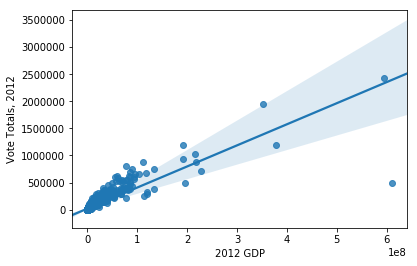

In [48]:
sb.regplot(data = Analysis_File, x = '2012 GDP', y = 'total_2012')
plt.xlabel('2012 GDP')
plt.ylabel('Vote Totals, 2012');

In [49]:
Analysis_File['2012 GDP'].corr(Analysis_File['total_2012'])

0.8539876080351082

This variable seems to have a very strong correlation as suspected, but the original distribution check comes to mind, so to clarify the linear relationship I will examine the logged Transformation. I believe I will primarily be using the log of GDP as I am curious about vote totals. 

In [50]:
#As I intend to run a regression later I am going to transform these variables for future use after my findings in the 
#Univariate portion of this Analysis. 
Analysis_File['log_2012_GDP'] = np.log10(Analysis_File['2012 GDP'])

In [51]:
Analysis_File['log_2012_GDP'].corr(Analysis_File['total_2012'])

0.6361051164158706

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


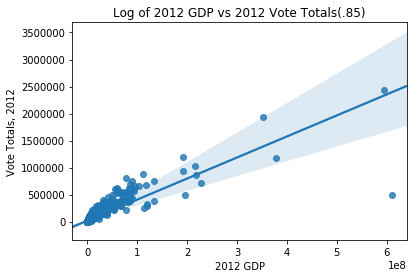

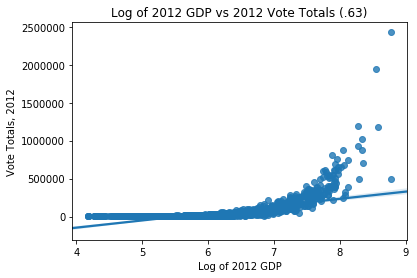

In [53]:
#As is visible here the Linear Relationship is much clear even if there is a lesser correlation. It will also be of use 
#later
plt.figure(1)
sb.regplot(data = Analysis_File, x = '2012 GDP', y = 'total_2012')
plt.xlabel('2012 GDP')
plt.ylabel('Vote Totals, 2012')
plt.title('Log of 2012 GDP vs 2012 Vote Totals(.85)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'log_2012_GDP', y = 'total_2012')
plt.xlabel('Log of 2012 GDP')
plt.ylabel('Vote Totals, 2012')
plt.title('Log of 2012 GDP vs 2012 Vote Totals (.63)')
plt.show();

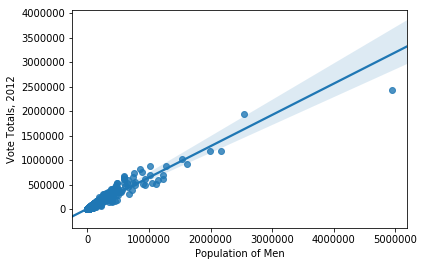

In [54]:
sb.regplot(data = Analysis_File, x = 'Men', y = 'total_2012')
plt.xlabel('Population of Men')
plt.ylabel('Vote Totals, 2012');

In [55]:
#Correlation is I believe to high, the Right skewedness is impacting our results. A log it is!
Analysis_File['Men'].corr(Analysis_File['total_2012'])

0.962484797491126

In [56]:
Analysis_File['log_Men'] = np.log10(Analysis_File['Men'])
Analysis_File['log_Men'].corr(Analysis_File['total_2012'])

0.6208541317176324

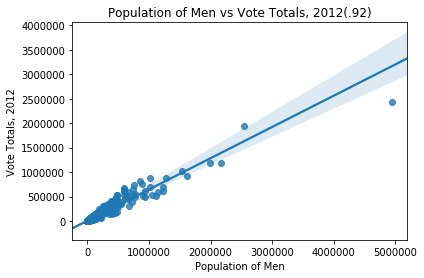

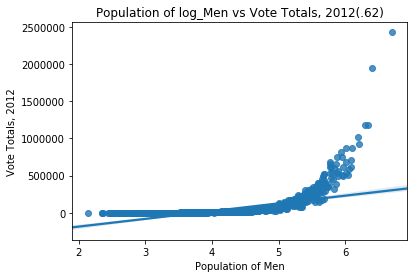

In [57]:
#This is another data point where we need to convert it to strengthen the linear relationship and gather a true result. 
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'Men', y = 'total_2012')
plt.xlabel('Population of Men')
plt.ylabel('Vote Totals, 2012')
plt.title('Population of Men vs Vote Totals, 2012(.92)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'log_Men', y = 'total_2012')
plt.xlabel('Population of Men')
plt.ylabel('Vote Totals, 2012')
plt.title('Population of log_Men vs Vote Totals, 2012(.62)')
plt.show();

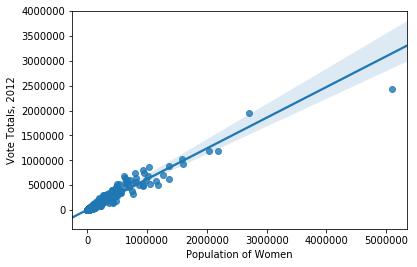

In [58]:
sb.regplot(data = Analysis_File, x = 'Women', y = 'total_2012')
plt.xlabel('Population of Women')
plt.ylabel('Vote Totals, 2012');

In [59]:
#Same result as previously. 
Analysis_File['Women'].corr(Analysis_File['total_2012'])

0.9654141346064492

In [60]:
Analysis_File['log_Women'] = np.log10(Analysis_File['Women'])

In [61]:
Analysis_File['log_Women'].corr(Analysis_File['total_2012'])

0.6202332540933634

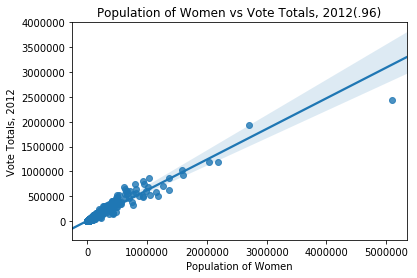

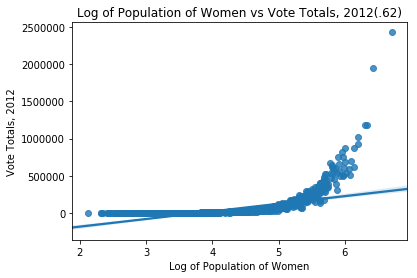

In [62]:
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'Women', y = 'total_2012')
plt.xlabel('Population of Women')
plt.ylabel('Vote Totals, 2012');
plt.title('Population of Women vs Vote Totals, 2012(.96)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'log_Women', y = 'total_2012')
plt.xlabel('Log of Population of Women')
plt.ylabel('Vote Totals, 2012')
plt.title('Log of Population of Women vs Vote Totals, 2012(.62)')

plt.show();

This result is roughly in line with what is suspected so far. So continuing on....Im going to grab the correlation of my other IVs. After this result though I dont think I will be keeping this variable in my model or Men. They will be to highly correlated to the other Demographic Groups. 

In [63]:
Analysis_File['White'].corr(Analysis_File['total_2012'])

-0.23181264618828595

In [64]:
Analysis_File['Black'].corr(Analysis_File['total_2012'])

0.09337048712333205

In [65]:
Analysis_File['Hispanic'].corr(Analysis_File['total_2012'])

0.15193178857930395

In [66]:
Analysis_File['Native'].corr(Analysis_File['total_2012'])

-0.054181167324580275

In [67]:
Analysis_File['Asian'].corr(Analysis_File['total_2012'])

0.5237519669356724

In [68]:
Analysis_File['Pacific'].corr(Analysis_File['total_2012'])

0.05986701633105545

In [69]:
Analysis_File['Per_Citizen'].corr(Analysis_File['total_2012'])

-0.23868061113458944

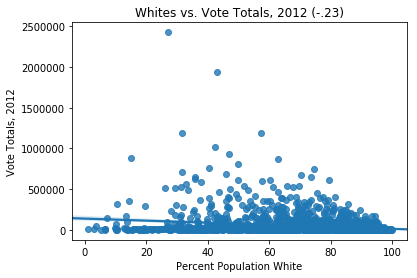

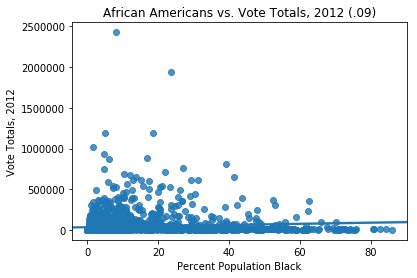

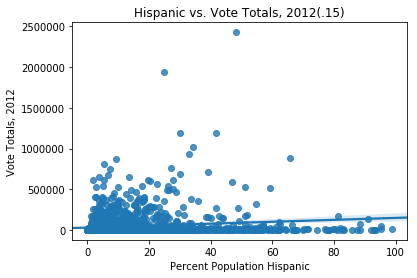

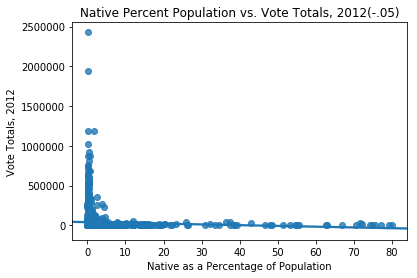

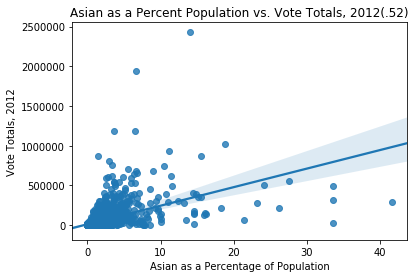

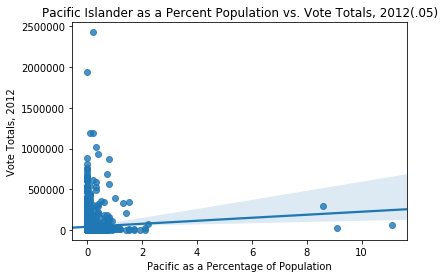

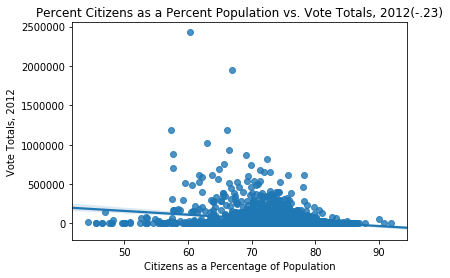

In [70]:
#Racial Groups and citizens by the variable of interest. The correlation is in the title.
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'White', y = 'total_2012')
plt.xlabel('Percent Population White')
plt.ylabel('Vote Totals, 2012')
plt.title('Whites vs. Vote Totals, 2012 (-.23)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'Black', y = 'total_2012')
plt.xlabel('Percent Population Black')
plt.ylabel('Vote Totals, 2012')
plt.title('African Americans vs. Vote Totals, 2012 (.09)')

plt.figure(3)
sb.regplot(data = Analysis_File, x = 'Hispanic', y = 'total_2012')
plt.xlabel('Percent Population Hispanic')
plt.ylabel('Vote Totals, 2012')
plt.title('Hispanic vs. Vote Totals, 2012(.15)')

plt.figure(4)
sb.regplot(data = Analysis_File, x = 'Native', y = 'total_2012')
plt.xlabel('Native as a Percentage of Population')
plt.ylabel('Vote Totals, 2012')
plt.title('Native Percent Population vs. Vote Totals, 2012(-.05)')

plt.figure(5)
sb.regplot(data = Analysis_File, x = 'Asian', y = 'total_2012')
plt.xlabel('Asian as a Percentage of Population')
plt.ylabel('Vote Totals, 2012')
plt.title('Asian as a Percent Population vs. Vote Totals, 2012(.52)')

plt.figure(6)
sb.regplot(data = Analysis_File, x = 'Pacific', y = 'total_2012')
plt.xlabel('Pacific as a Percentage of Population')
plt.ylabel('Vote Totals, 2012')
plt.title('Pacific Islander as a Percent Population vs. Vote Totals, 2012(.05)')

plt.figure(7)
sb.regplot(data = Analysis_File, x = 'Per_Citizen', y = 'total_2012')
plt.xlabel('Citizens as a Percentage of Population')
plt.ylabel('Vote Totals, 2012')
plt.title('Percent Citizens as a Percent Population vs. Vote Totals, 2012(-.23)')

plt.show();

The two most interesting results here are for Whites and for Asian-Americans. The negative correlation points to the fact that as population of Whites increase that voting decreases. Where as Asian-Americans increase vote totals significantly. This interaction was both expected and unexpected. Minorities often vote in lower numbers, which makes the Asian-American result interesting. Whites are generally more affluent, which implies higher political participation. My theory, which is outside of this analysis is that as Whites represent the majority of population, this result is due to the low number of Americans who vote.

In [71]:
Analysis_File['Poverty'].corr(Analysis_File['total_2012'])

-0.09293202318933566

In [72]:
Analysis_File['IncomePerCap'].corr(Analysis_File['total_2012'])

0.32427349195119104

In [73]:
Analysis_File['Unemployment'].corr(Analysis_File['total_2012'])

0.04816884026956148

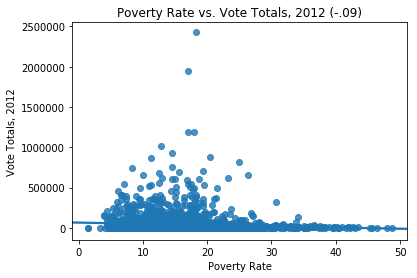

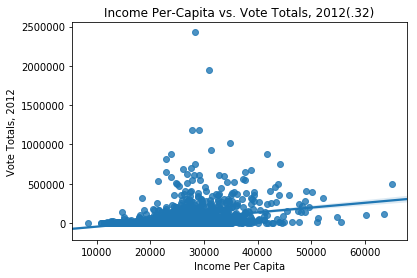

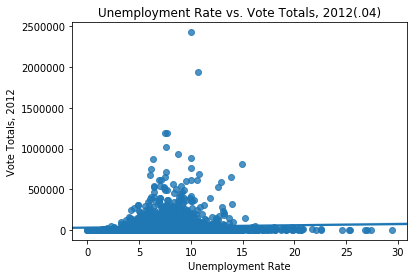

In [74]:
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'Poverty', y = 'total_2012')
plt.xlabel('Poverty Rate')
plt.ylabel('Vote Totals, 2012')
plt.title('Poverty Rate vs. Vote Totals, 2012 (-.09)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'IncomePerCap', y = 'total_2012')
plt.xlabel('Income Per Capita')
plt.ylabel('Vote Totals, 2012')
plt.title('Income Per-Capita vs. Vote Totals, 2012(.32)')

plt.figure(3)
sb.regplot(data = Analysis_File, x = 'Unemployment', y = 'total_2012')
plt.xlabel('Unemployment Rate')
plt.ylabel('Vote Totals, 2012')
plt.title('Unemployment Rate vs. Vote Totals, 2012(.04)')

plt.show();

The really interesting result is Unemployment appearing to cause an increase in vote totals. Perhaps those who are Unemployed vote at a higher rate. I'd need much more data to make a deeper analysis of this. I will be interested to see what the Regression turns out for coefficients.

In [75]:
Analysis_File['Total Number of Adherents'].corr(Analysis_File['total_2012'])

0.9446949147156121

An incredibly high correlation, which is suspect as this proxy for religious belief should not have a near 100% correlation with voting totals. Lets try the transformed variable.

In [76]:
Analysis_File['Religiousity'].corr(Analysis_File['total_2012'])

-0.07788981221602169

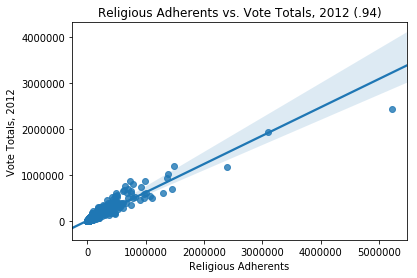

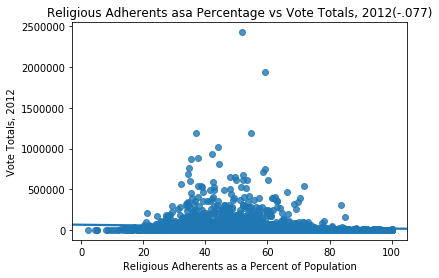

In [77]:
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'Total Number of Adherents', y = 'total_2012')
plt.xlabel('Religious Adherents')
plt.ylabel('Vote Totals, 2012')
plt.title('Religious Adherents vs. Vote Totals, 2012 (.94)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'Religiousity', y = 'total_2012')
plt.xlabel('Religious Adherents as a Percent of Population')
plt.ylabel('Vote Totals, 2012')
plt.title('Religious Adherents asa Percentage vs Vote Totals, 2012(-.077)')

plt.show();

In [78]:
#I am broadly curious about the relationships between poverty and unemployment as well as racial groups. Based off the
#results of the previous correlations I want to zero in on it a bit more. 
Analysis_File['Poverty'].corr(Analysis_File['Unemployment'])

0.651269954673253

In [79]:
#I expect there might be a causal relationship between poverty and low or negative voting rates as well as positive 
#voting rates
Analysis_File['Poverty'].corr(Analysis_File['White'])

-0.4727166975806845

In [80]:
Analysis_File['Unemployment'].corr(Analysis_File['White'])

-0.4210679004596597

In [81]:
Analysis_File['Poverty'].corr(Analysis_File['Native'])

0.23720718606513486

In [82]:
Analysis_File['Unemployment'].corr(Analysis_File['Native'])

0.18226177090459605

In [83]:
Analysis_File['Poverty'].corr(Analysis_File['Asian'])

-0.1317497114517537

In [84]:
Analysis_File['Unemployment'].corr(Analysis_File['Asian'])

-0.004054422928718471

The correlation did not appear to hold. Though other assumptions did about Whites generally being richer, etc

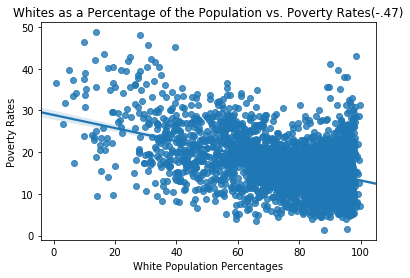

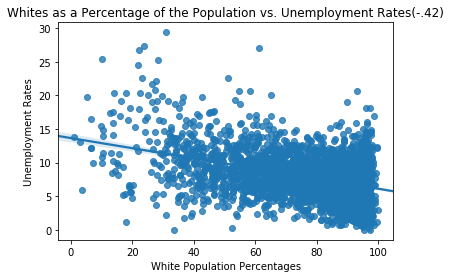

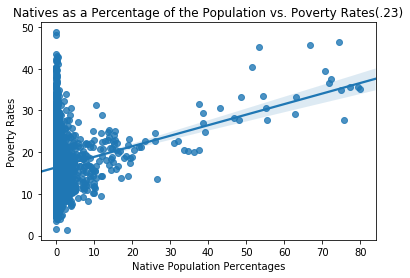

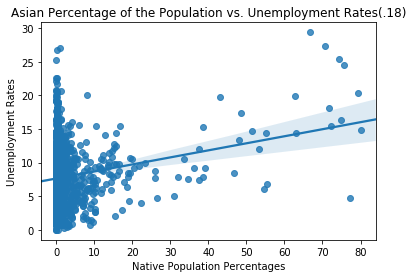

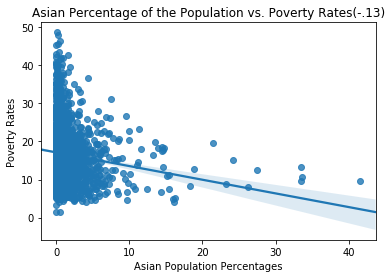

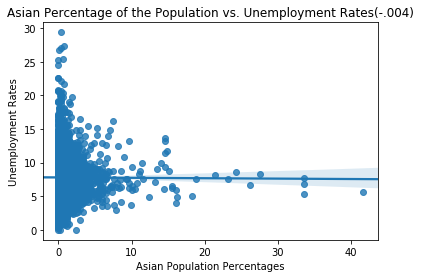

In [85]:
plt.figure(1)
sb.regplot(data = Analysis_File, x = 'White', y = 'Poverty')
plt.xlabel('White Population Percentages')
plt.ylabel('Poverty Rates')
plt.title('Whites as a Percentage of the Population vs. Poverty Rates(-.47)')

plt.figure(2)
sb.regplot(data = Analysis_File, x = 'White', y = 'Unemployment')
plt.xlabel('White Population Percentages')
plt.ylabel('Unemployment Rates')
plt.title('Whites as a Percentage of the Population vs. Unemployment Rates(-.42)')

plt.figure(3)
sb.regplot(data = Analysis_File, x = 'Native', y = 'Poverty')
plt.xlabel('Native Population Percentages')
plt.ylabel('Poverty Rates')
plt.title('Natives as a Percentage of the Population vs. Poverty Rates(.23)')

plt.figure(4)
sb.regplot(data = Analysis_File, x = 'Native', y = 'Unemployment')
plt.xlabel('Native Population Percentages')
plt.ylabel('Unemployment Rates')
plt.title('Asian Percentage of the Population vs. Unemployment Rates(.18)')

plt.figure(5)
sb.regplot(data = Analysis_File, x = 'Asian', y = 'Poverty')
plt.xlabel('Asian Population Percentages')
plt.ylabel('Poverty Rates')
plt.title('Asian Percentage of the Population vs. Poverty Rates(-.13)')

plt.figure(6)
sb.regplot(data = Analysis_File, x = 'Asian', y = 'Unemployment')
plt.xlabel('Asian Population Percentages')
plt.ylabel('Unemployment Rates')
plt.title('Asian Percentage of the Population vs. Unemployment Rates(-.004)')

plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> So the variable of interest for 2012 vote totals fared moderately well. Given the amount of insight we can gain just based off these simple plots. That being said the there were some results from the Scatter Plots that are intersting.
1. GDP has a very positive correlation to vote totals, but this makes sense. Areas with higher GDP are likely to have the resources and populations to make voting more accessible. I did however take the log for future analysis. 
2. Income per-Capita shows us that the correlation at a lower level actually is lesser than just straight GDP, but makes some sense if you consider that Income-per Capita can be quite skewed by extremely wealthy individuals in an area.
3. Of the Racial Groups the one that is surprising to me is the correlation on White and vote totals. There appears to be a  negative correlation to the presence of White populations and vote totals in 2012. When taken into account with the other Independent Variables this seems to match up with the more positive correlations. As communities diversify, voting increased. Every Minority group saw a positive correlation to vote totals except for Native Americans and citizens.
4. Poverty, causes a decrease in voting totals. This makes intuitive sense as poverty is often correlated with lower pay for more work, less leisure time, and by extension less time to engage in politics. 
5. The really fascinating result here is Unemployment. Justifying this would take a county level analysis of the procedures for voting where this effect appears. Traditional wisdom would imply that high levels of unemployment should indicate higher levels of poverty, a simple correlation tells us this is true, but our visualization and correlation with vote totals says otherwise.
6. The last interesting data point is the result from the check between percentage of citizens and vote totals. As the number of citizens increases, then voting goes down. Given there is almost zero voting by those who aren't citizens it begs the question what is driving this result? As the correlation is pretty similar to the resukts from Whites I suspect the large population percentage of Whites could very well be impacting tis result. Possibly collinear as well with other Demographic Groups. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is good to be White in this country. Or at least that is what the preliminary scatterplots show when comparing different Racial groups to poverty and unemployment. Furthermore teh results from Asian Americans is definitely one I wish to investigate more as it implies that a significant driver of vote totals for minority groups could be Asian-American participation.  

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Now my intent is to try to drill down into the comparison between GOP and DNC 
Totals to compare them off the Relevant IVs used so far. Furthermore I want to investigate the effect observed in the 
Univariate portion of the analysis

In [86]:
#Breaking down the variables with a categorical 'win' column
Analysis_File['Category_Winning_Party'] = 0
Analysis_File.loc[(Analysis_File['dem_2012'] > Analysis_File['gop_2012']) & (Analysis_File['dem_2012'] > Analysis_File['oth_2012']), 'Category_Winning_Party'] = 'DNC'
Analysis_File.loc[(Analysis_File['gop_2012'] > Analysis_File['dem_2012']) & (Analysis_File['gop_2012'] > Analysis_File['oth_2012']), 'Category_Winning_Party'] = 'GOP'
Analysis_File.loc[(Analysis_File['oth_2012'] > Analysis_File['dem_2012']) & (Analysis_File['oth_2012'] > Analysis_File['gop_2012']), 'Category_Winning_Party'] = 'OTH'

In [87]:
Analysis_File['Category_Winning_Party'].value_counts()

GOP    2397
DNC     661
Name: Category_Winning_Party, dtype: int64

In [88]:
#As expected, no counties were captured by other parties..even with a vote total of 1.9M 
Analysis_File['oth_2012'].sum()

1923143

In [89]:
Analysis_File['dem_2012'].sum()

61426200

In [90]:
Analysis_File['gop_2012'].sum()

58066899

In [91]:
Analysis_File['Category_Winning_Party'].shape

(3058,)

In [92]:
Analysis_File['Category_Winning_Party'].dtypes

dtype('O')

In [93]:
Analysis_File['Category_Winning_Party'].value_counts()

GOP    2397
DNC     661
Name: Category_Winning_Party, dtype: int64

In [94]:
print(2397+661)

3058


Now to make these vote totals into a useable set of columns for analysis and visualization.

In [95]:
DNC_State_Totals_2012 = Analysis_File.groupby('Postal')['dem_2012'].sum()

In [96]:
GOP_State_Totals_2012 = Analysis_File.groupby('Postal')['gop_2012'].sum()

In [97]:
State_Winners = DNC_State_Totals_2012-GOP_State_Totals_2012

In [98]:
State_Winners.to_frame(name ='State_Winners').reset_index(['Postal'])

,Postal,State_Winners
0,AL,-458833
1,AR,-251764
2,AZ,-207049
3,CA,2195124
4,CO,113099
5,CT,281099
6,DC,204995
7,DE,77071
8,FL,73189
9,GA,-308460


In [99]:
State_Winners.to_csv('State_Level_Winners_2012.csv')

In [100]:
State_Winners_2012 = pd.read_csv('State_Level_Winners_2012.csv', header=None)

In [101]:
State_Winners_2012.head()

,0,1
0,AL,-458833
1,AR,-251764
2,AZ,-207049
3,CA,2195124
4,CO,113099


In [102]:
State_Winners_2012 = State_Winners_2012.rename(columns = {0 : 'State'})
State_Winners_2012 = State_Winners_2012.rename(columns = {1 : 'Vote_Count'})

In [103]:
State_Winners_2012.head()

,State,Vote_Count
0,AL,-458833
1,AR,-251764
2,AZ,-207049
3,CA,2195124
4,CO,113099


In [104]:
State_Winners_2012['Win_Party'] = 0
State_Winners_2012.loc[(State_Winners_2012['Vote_Count'] > 1), 'Win_Party'] = 'DNC'
State_Winners_2012.loc[(State_Winners_2012['Vote_Count'] < 1), 'Win_Party'] = 'GOP'

In [105]:
State_Winners_2012['Win_Party'].value_counts()

DNC    27
GOP    23
Name: Win_Party, dtype: int64

In [106]:
State_Winners_2012.to_csv('State_Level_Winners_2012_Final.csv')

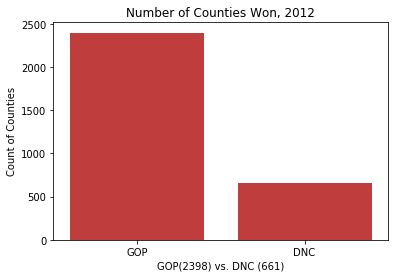

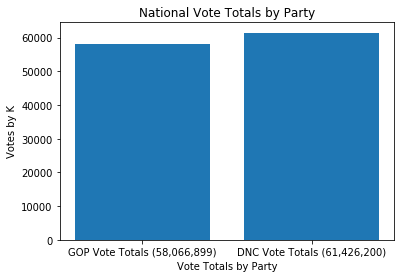

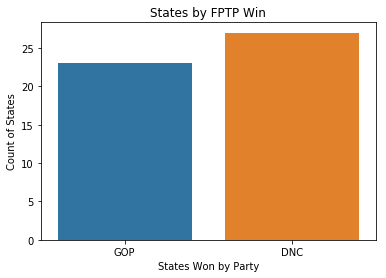

In [107]:
#Lets comparer number of votes to number of counties won. 
plt.figure(1)
base_color = sb.color_palette()[3]
sb.countplot(data = Analysis_File, x = 'Category_Winning_Party', color = base_color)
plt.title('Number of Counties Won, 2012')
plt.xlabel('GOP(2398) vs. DNC (661)')
plt.ylabel('Count of Counties')

plt.figure(2)
plt.bar([1, 2], [58066.899, 61426.200], tick_label=['GOP Vote Totals (58,066,899)', 'DNC Vote Totals (61,426,200)']);
plt.title('National Vote Totals by Party')
plt.xlabel('Vote Totals by Party')
plt.ylabel('Votes by K');

plt.figure(3)
sb.countplot(data = State_Winners_2012, x = 'Win_Party')
plt.title('States by FPTP Win')
plt.xlabel('States Won by Party')
plt.ylabel('Count of States')

plt.show();

This confirms what we saw in the distributions of vote totaals as a percentage. More counties for the GOP, but less votes. Guven Barack Obamas Electoral win as well it would also imply that the States captured by the DNC were more populous, and worth more electoral votes.

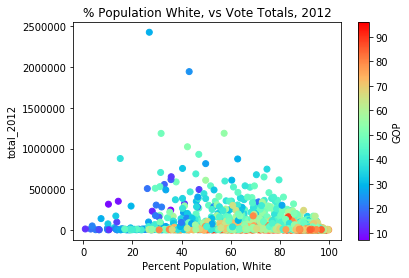

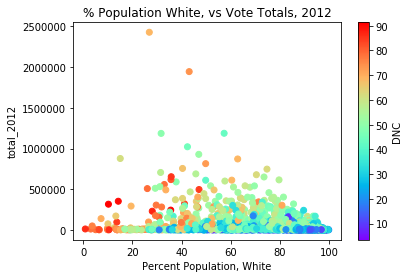

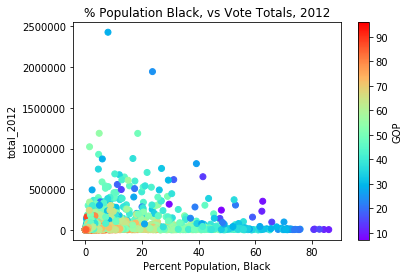

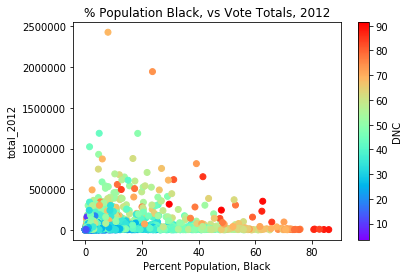

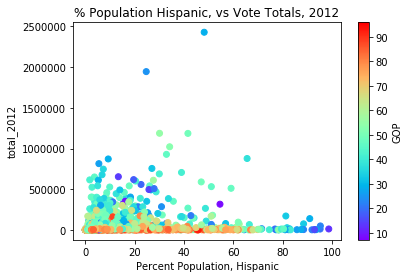

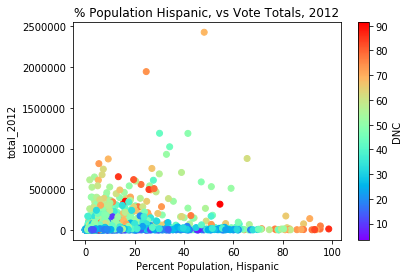

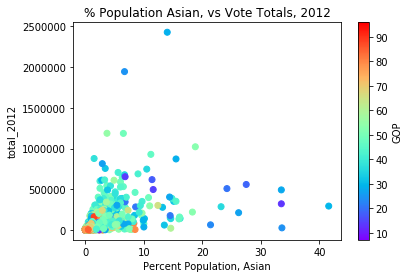

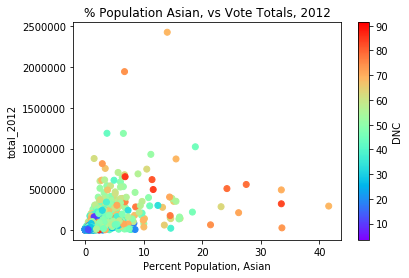

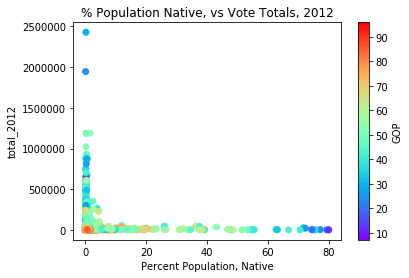

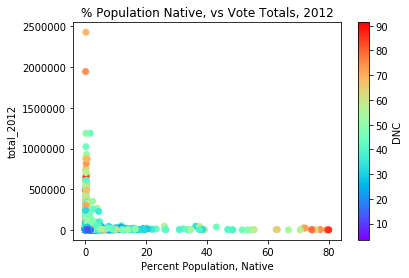

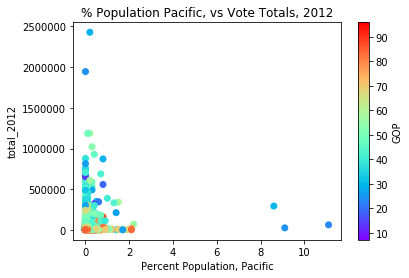

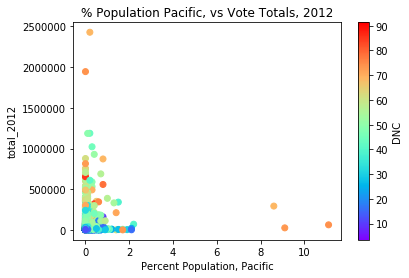

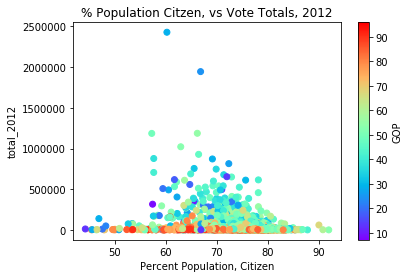

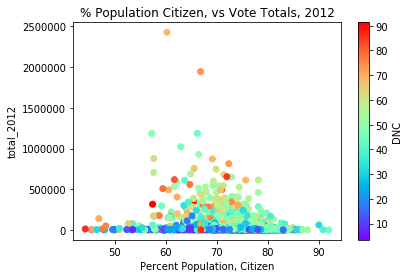

In [108]:
plt.figure(1)
plt.scatter(data = Analysis_File, x = 'White', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, White')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population White, vs Vote Totals, 2012')

plt.figure(2)
plt.scatter(data = Analysis_File, x = 'White', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, White')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population White, vs Vote Totals, 2012')

plt.figure(3)
plt.scatter(data = Analysis_File, x = 'Black', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Black')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Black, vs Vote Totals, 2012')

plt.figure(4)
plt.scatter(data = Analysis_File, x = 'Black', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Black')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Black, vs Vote Totals, 2012')

plt.figure(5)
plt.scatter(data = Analysis_File, x = 'Hispanic', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Hispanic')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Hispanic, vs Vote Totals, 2012')

plt.figure(6)
plt.scatter(data = Analysis_File, x = 'Hispanic', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Hispanic')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Hispanic, vs Vote Totals, 2012')

plt.figure(7)
plt.scatter(data = Analysis_File, x = 'Asian', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Asian')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Asian, vs Vote Totals, 2012')

plt.figure(8)
plt.scatter(data = Analysis_File, x = 'Asian', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Asian')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Asian, vs Vote Totals, 2012')

plt.figure(9)
plt.scatter(data = Analysis_File, x = 'Native', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Native')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Native, vs Vote Totals, 2012')

plt.figure(10)
plt.scatter(data = Analysis_File, x = 'Native', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Native')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Native, vs Vote Totals, 2012')

plt.figure(11)
plt.scatter(data = Analysis_File, x = 'Pacific', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Pacific')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Pacific, vs Vote Totals, 2012')

plt.figure(12)
plt.scatter(data = Analysis_File, x = 'Pacific', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Pacific')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Pacific, vs Vote Totals, 2012')

plt.figure(13)
plt.scatter(data = Analysis_File, x = 'Per_Citizen', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Percent Population, Citizen')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('% Population Citzen, vs Vote Totals, 2012')

plt.figure(14)
plt.scatter(data = Analysis_File, x = 'Per_Citizen', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Citizen')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Citizen, vs Vote Totals, 2012')

plt.show();

This doesnt quite vsiualize things the way I want. I will try a simple color palette change in the following visualizations. While it is informative and shows a clear party preference, I want to try a different look, tracking which counties were won percentage wise. However I want to check what each of these correlations show.

In [109]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Asian']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Asian']))

0.3292876371124639
-0.3313938309786201


In [110]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['White']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['White']))

-0.4374490650873427
0.41837358868357966


In [111]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Black']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Black']))

0.40198604364231627
-0.37757241000302194


In [112]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Hispanic']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Hispanic']))

0.08402605430965546
-0.08243168977293218


In [113]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Native']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Native']))

0.11891720433095197
-0.11869868861620403


In [114]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Pacific']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Pacific']))

0.07500266177952111
-0.07923267630445562


In [115]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Per_Citizen']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Per_Citizen']))

-0.02254803454133312
0.014565486064301516


The correlations all match their visuals and show a strong preference for one party over the other by the way of racial groups. Now lets check based off the Win Category variable. 

<Figure size 432x288 with 0 Axes>

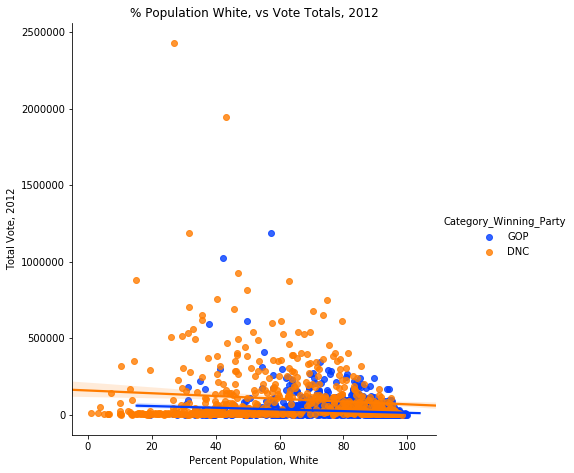

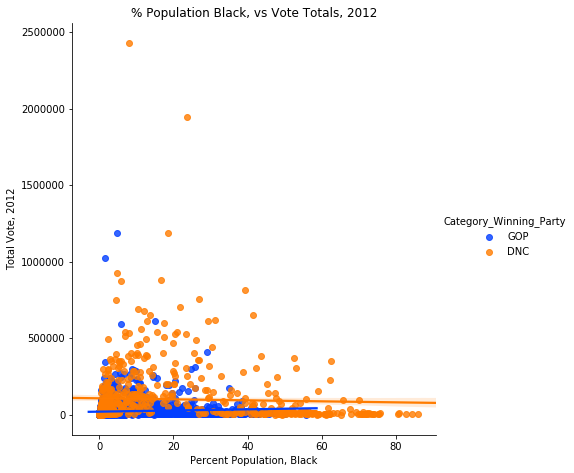

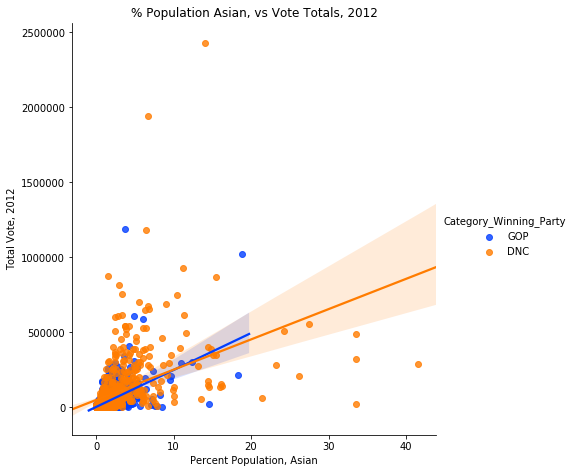

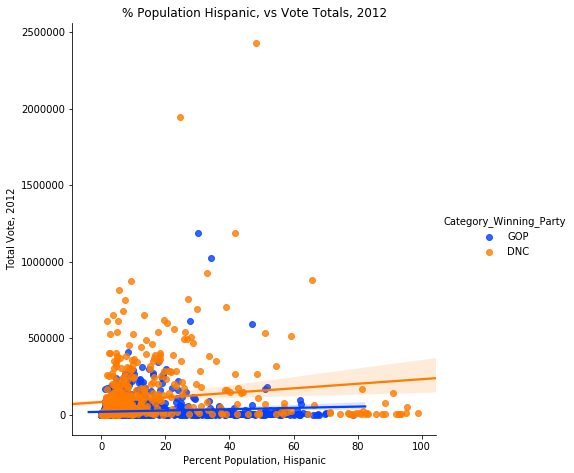

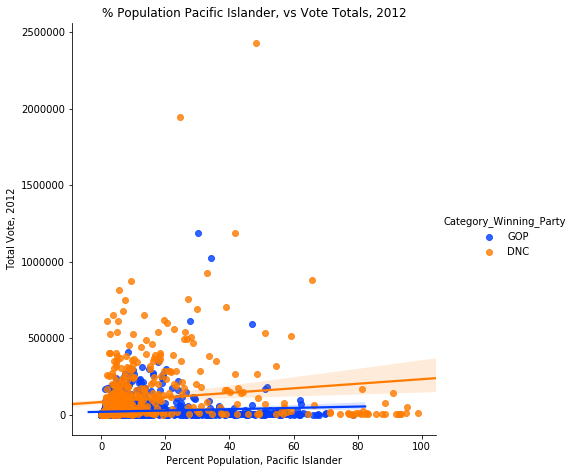

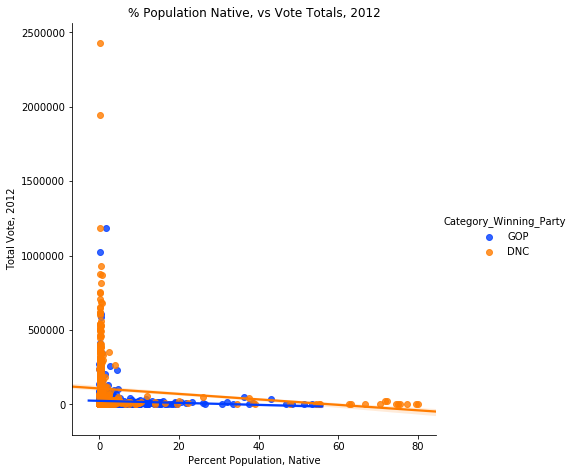

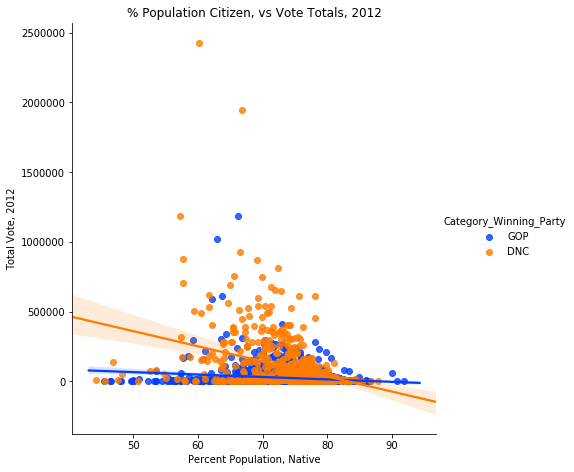

In [116]:
plt.figure(1)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'White', 'total_2012')
plt.xlabel('Percent Population, White')
plt.ylabel('Total Vote, 2012')
plt.title('% Population White, vs Vote Totals, 2012')
g.add_legend()

plt.figure(2)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Black', 'total_2012')
plt.xlabel('Percent Population, Black')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Black, vs Vote Totals, 2012')
g.add_legend()

plt.figure(3)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Asian', 'total_2012')
plt.xlabel('Percent Population, Asian')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Asian, vs Vote Totals, 2012')
g.add_legend()

plt.figure(4)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Hispanic', 'total_2012')
plt.xlabel('Percent Population, Hispanic')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Hispanic, vs Vote Totals, 2012')
g.add_legend()

plt.figure(5)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Hispanic', 'total_2012')
plt.xlabel('Percent Population, Pacific Islander')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Pacific Islander, vs Vote Totals, 2012')
g.add_legend()

plt.figure(6)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Native', 'total_2012')
plt.xlabel('Percent Population, Native')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Native, vs Vote Totals, 2012')
g.add_legend()

plt.figure(7)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Per_Citizen', 'total_2012')
plt.xlabel('Percent Population, Native')
plt.ylabel('Total Vote, 2012')
plt.title('% Population Citizen, vs Vote Totals, 2012')
g.add_legend()


plt.show();

This better demonstrates a party preference by racial group. It very much appears at least for White you cna see almost distinct clusters for the GOP in majority White Counties.  

<Figure size 432x288 with 0 Axes>

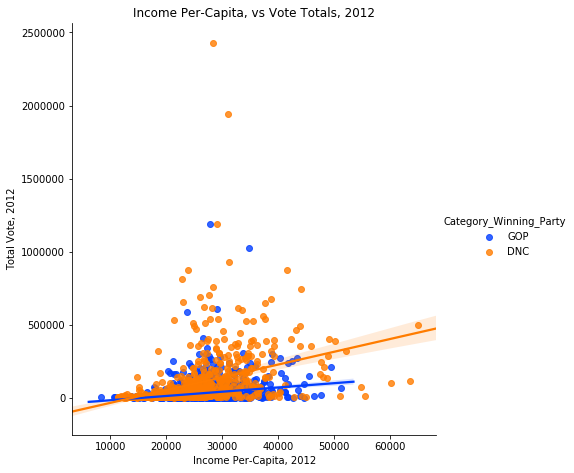

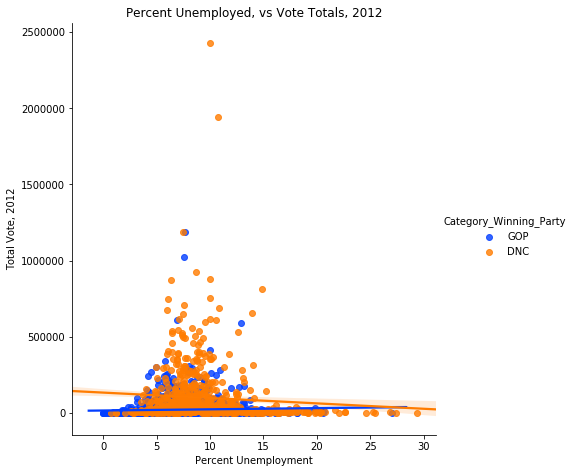

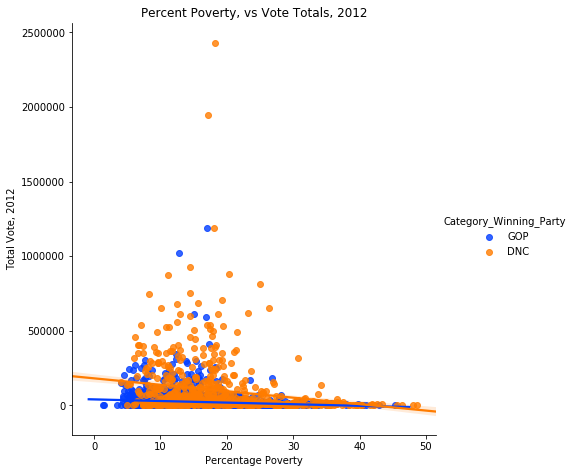

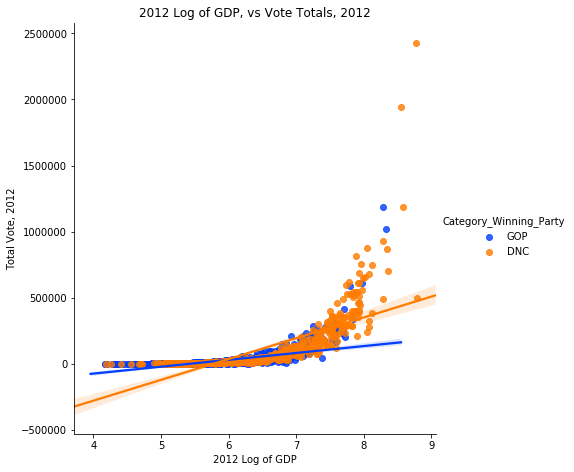

In [117]:
plt.figure(1)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'IncomePerCap', 'total_2012')
plt.xlabel('Income Per-Capita, 2012')
plt.ylabel('Total Vote, 2012')
plt.title('Income Per-Capita, vs Vote Totals, 2012')
g.add_legend()

plt.figure(2)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Unemployment', 'total_2012')
plt.xlabel('Percent Unemployment')
plt.ylabel('Total Vote, 2012')
plt.title('Percent Unemployed, vs Vote Totals, 2012')
g.add_legend()

plt.figure(3)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Poverty', 'total_2012')
plt.xlabel('Percentage Poverty')
plt.ylabel('Total Vote, 2012')
plt.title('Percent Poverty, vs Vote Totals, 2012')
g.add_legend()

plt.figure(4)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'log_2012_GDP', 'total_2012')
plt.xlabel('2012 Log of GDP')
plt.ylabel('Total Vote, 2012')
plt.title('2012 Log of GDP, vs Vote Totals, 2012')
g.add_legend()

plt.show();

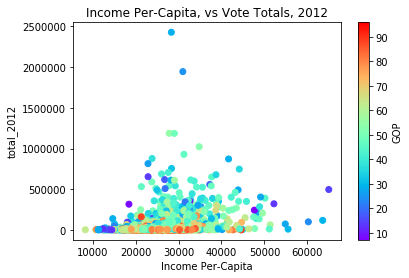

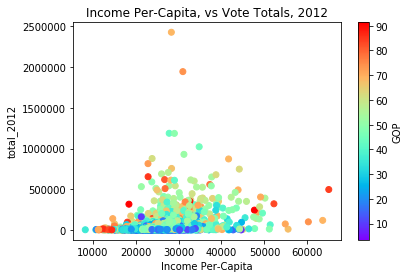

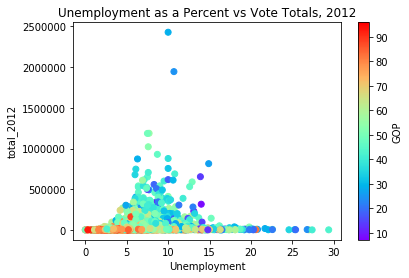

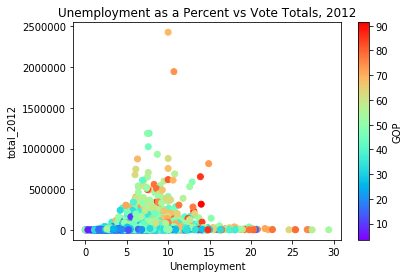

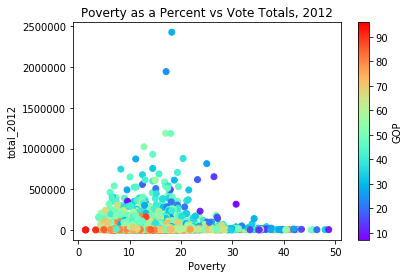

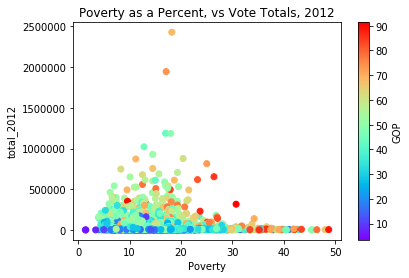

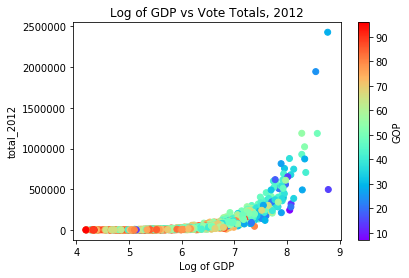

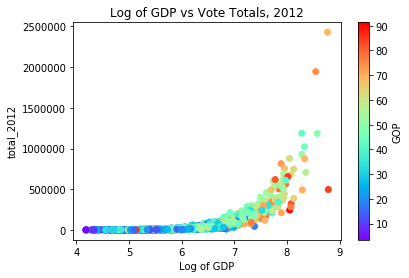

In [118]:
plt.figure(1)
plt.scatter(data = Analysis_File, x = 'IncomePerCap', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Income Per-Capita')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Income Per-Capita, vs Vote Totals, 2012')

plt.figure(2)
plt.scatter(data = Analysis_File, x = 'IncomePerCap', y = 'total_2012', c = 'Percent of Vote (2012), DNC',
            cmap = 'rainbow')
plt.xlabel('Income Per-Capita')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Income Per-Capita, vs Vote Totals, 2012')

plt.figure(3)
plt.scatter(data = Analysis_File, x = 'Unemployment', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Unemployment')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Unemployment as a Percent vs Vote Totals, 2012')

plt.figure(4)
plt.scatter(data = Analysis_File, x = 'Unemployment', y = 'total_2012', c = 'Percent of Vote (2012), DNC',
            cmap = 'rainbow')
plt.xlabel('Unemployment')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Unemployment as a Percent vs Vote Totals, 2012')

plt.figure(5)
plt.scatter(data = Analysis_File, x = 'Poverty', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Poverty')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Poverty as a Percent vs Vote Totals, 2012')

plt.figure(6)
plt.scatter(data = Analysis_File, x = 'Poverty', y = 'total_2012', c = 'Percent of Vote (2012), DNC',
            cmap = 'rainbow')
plt.xlabel('Poverty')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Poverty as a Percent, vs Vote Totals, 2012')

plt.figure(7)
plt.scatter(data = Analysis_File, x = 'log_2012_GDP', y = 'total_2012', c = 'Percent of Vote (2012), GOP',
            cmap = 'rainbow')
plt.xlabel('Log of GDP')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Log of GDP vs Vote Totals, 2012')

plt.figure(8)
plt.scatter(data = Analysis_File, x = 'log_2012_GDP', y = 'total_2012', c = 'Percent of Vote (2012), DNC',
            cmap = 'rainbow')
plt.xlabel('Log of GDP')
plt.ylabel('total_2012');
plt.colorbar(label = 'GOP')
plt.title('Log of GDP vs Vote Totals, 2012')

plt.show()

Interesting result here starting from the top is that the higher the Income Per Capita, the more party affiliation people have with Democrats. Unemployment was roughly equal, but it seems counties with higher(>20%) Unemployment actually voted Democrat, Poverty is roughly equivalent and the log of GDP is showing a far more positive correlation with DNC.I will check the correlations below.

In [119]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['IncomePerCap']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['IncomePerCap']))

0.11253864185205878
-0.11928737664328429


In [120]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Unemployment']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Unemployment']))

0.3290915647634793
-0.31862642362274135


In [121]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['Poverty']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['Poverty']))

0.20090677607123883
-0.19149185259475868


In [122]:
print(Analysis_File['Percent of Vote (2012), DNC'].corr(Analysis_File['log_2012_GDP']))
print(Analysis_File['Percent of Vote (2012), GOP'].corr(Analysis_File['log_2012_GDP']))

0.40425593286045747
-0.39893863593032153


<Figure size 432x288 with 0 Axes>

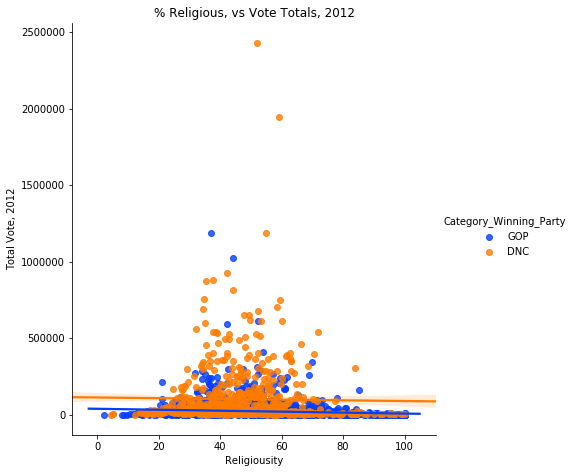

In [123]:
plt.figure(1)
g = sb.FacetGrid(data = Analysis_File, hue = 'Category_Winning_Party', 
                palette = 'bright', height = 6.5)
g.map(sb.regplot, 'Religiousity', 'total_2012')
plt.xlabel('Religiousity')
plt.ylabel('Total Vote, 2012')
plt.title('% Religious, vs Vote Totals, 2012')
g.add_legend()



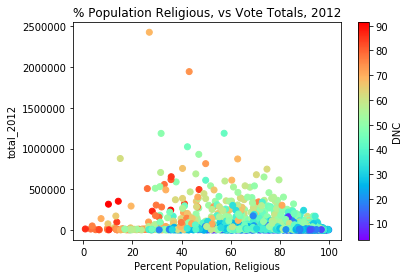

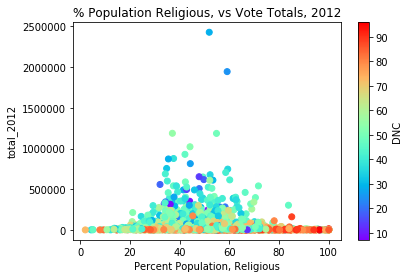

In [124]:
plt.figure(1)
plt.scatter(data = Analysis_File, x = 'White', y = 'total_2012', c = 'Percent of Vote (2012), DNC', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Religious')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Religious, vs Vote Totals, 2012')

plt.figure(2)
plt.scatter(data = Analysis_File, x = 'Religiousity', y = 'total_2012', c = 'Percent of Vote (2012), GOP', 
            cmap = 'rainbow')
plt.xlabel('Percent Population, Religious')
plt.ylabel('total_2012');
plt.colorbar(label = 'DNC')
plt.title('% Population Religious, vs Vote Totals, 2012')

plt.show();

In [125]:
#Time for Regression to test out some of the effects we have seen as we have plotted vsiualizations

In [126]:
import statsmodels.api as sm

In [127]:
#Grabbing the Variable Names
Analysis_File.dtypes

FIPS                             int64
Postal                          object
2012 GDP                         int64
2013 GDP                         int64
2014 GDP                         int64
2015 GDP                         int64
county                          object
total_2008                       int64
dem_2008                         int64
gop_2008                         int64
oth_2008                         int64
total_2012                       int64
dem_2012                         int64
gop_2012                         int64
oth_2012                         int64
total_2016                       int64
dem_2016                         int64
gop_2016                         int64
oth_2016                         int64
TotalPop                         int64
Men                              int64
Women                            int64
Hispanic                       float64
White                          float64
Black                          float64
Native                   

In [128]:
#Lets check Demographic influences on vote totals in 2012
X = Analysis_File[["White", "Black", "Hispanic", "Asian", "Pacific", "Native", "Per_Citizen"]]
y = Analysis_File["total_2012"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#This is another highly predictive model and does well in avoiding auto correlation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_2012   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     293.6
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:09:09   Log-Likelihood:                -39142.
No. Observations:                3058   AIC:                         7.830e+04
Df Residuals:                    3051   BIC:                         7.834e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
White         784.6257    327.161      2.398      0.017     143.147    1426.105
Black        1317.3056    328.423      4.011      0.000     673.352    1961.259
Hispanic     1146.3102    244.816      4.682      0.000     666.289    1626.331
Asian         2.68e+04    763.300     35.114      0.000    2.53e+04    2.83e+04
Pacific     -5.682e+04   5235.774    -10.853      0.000   -6.71e+04   -4.66e+04
Native        521.4607    387.925      1.344      0.179    -239.161    1282.082
Per_Citizen  -957.1284    411.963     -2.323      0.020   -1764.882    -149.375
==============================================================================
Omnibus:                     4691.165   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3616698.815
Skew:                           9.270   Prob(JB):                         0.00
Kurtosis:                     170.455   Cond. No.                         362.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
#Lets check Economic influences on vote totals in 2012
X = Analysis_File[["IncomePerCap", "Unemployment", "Poverty", "log_2012_GDP"]]
y = Analysis_File["total_2012"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#This model has much less autocorrelation, but low r-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_2012   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     265.2
Date:                Sun, 24 Feb 2019   Prob (F-statistic):          7.49e-196
Time:                        22:09:09   Log-Likelihood:                -39474.
No. Observations:                3058   AIC:                         7.896e+04
Df Residuals:                    3054   BIC:                         7.898e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
IncomePerCap    -4.6945      0.447    -10.496      0.000      -5.572      -3.818
Unemployment  1758.9929    686.641      2.562      0.010     412.667    3105.318
Poverty      -6333.2390    374.675    -16.903      0.000   -7067.881   -5598.597
log_2012_GDP  4.202e+04   2538.512     16.552      0.000     3.7e+04     4.7e+04
==============================================================================
Omnibus:                     4789.794   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3383059.220
Skew:                           9.739   Prob(JB):                         0.00
Kurtosis:                     164.777   Cond. No.                     3.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our R-Squared for each of these models only explains the variation for roughly 60% of our model. Lets add in the Religiousity variable generated before along with Demographic and economic indicators.

In [130]:
X = Analysis_File[["White", "Black", "Hispanic", "Asian", "Pacific", "Native", "Religiousity", 
                   "Unemployment", "Poverty", "log_2012_GDP"]]
y = Analysis_File["total_2012"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
##This is actually our best model. A Time series element to account for the Auto Correlation demonstrated by the
##Durbin Watson Testing needs to be included. Demographics appear to be our greatest predictor

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_2012   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     337.9
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        22:09:09   Log-Likelihood:                -38789.
No. Observations:                3058   AIC:                         7.760e+04
Df Residuals:                    3048   BIC:                         7.766e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
White        -3904.3655    167.961    -23.246      0.000   -4233.693   -3575.038
Black        -3551.6118    235.765    -15.064      0.000   -4013.887   -3089.337
Hispanic     -3479.9117    214.027    -16.259      0.000   -3899.564   -3060.259
Asian         9890.4279    882.362     11.209      0.000    8160.344    1.16e+04
Pacific      -4.419e+04   4618.967     -9.567      0.000   -5.32e+04   -3.51e+04
Native       -3920.6192    319.724    -12.263      0.000   -4547.515   -3293.723
Religiousity   131.6883     87.591      1.503      0.133     -40.055     303.432
Unemployment   407.8659    586.231      0.696      0.487    -741.581    1557.313
Poverty       -301.7213    324.477     -0.930      0.353    -937.936     334.494
log_2012_GDP  6.669e+04   2445.857     27.268      0.000    6.19e+04    7.15e+04
==============================================================================
Omnibus:                     5164.577   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6643991.354
Skew:                          11.158   Prob(JB):                         0.00
Kurtosis:                     230.257   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
print((6.669*10*10*10*10)/100)

666.9


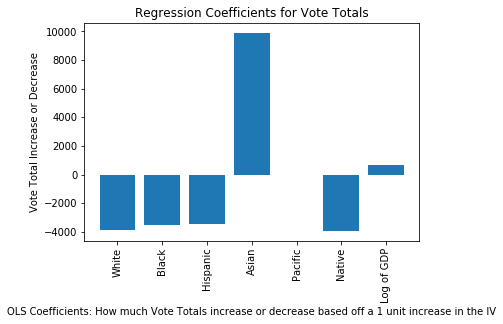

In [132]:
plt.bar([1, 2, 3, 4, 5, 6, 7], [-3904, -3551, -3479, 9890, -4, -3920, 666.9], 
        tick_label=['White', 'Black', 'Hispanic', 'Asian', 'Pacific', 'Native', 'Log of GDP'])
plt.title('Regression Coefficients for Vote Totals')
plt.xticks(rotation=90)
plt.ylabel('Vote Total Increase or Decrease')
plt.xlabel('OLS Coefficients: How much Vote Totals increase or decrease based off a 1 unit increase in the IV')
plt.show();

This model is as good as we will get without breaking the OLS Assumptions, lets move on to testing GOP and DNC, but first analysis. This model and the coefficients have high levels of statistical significance in predicting vote totals. 
However, that is really only for Demographic characteristics. The Religion and Economic Indicators do not in fact show signifigance at the P<.05 level. It would appear, broadly speaking the best indicators in 2012 of vote totals were 
Demographics. I would run checks om 2008 and 2016, but due to the data we have it is unlikely we can provide valuable results. 

In [133]:
X = Analysis_File[["White", "Black", "Hispanic", "Asian", "Pacific", "Native", "Religiousity", 
                   "Unemployment", "Poverty", "log_2012_GDP"]]
y = Analysis_File["Percent of Vote (2012), GOP"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
##This model has high Auto-Correlation and breaks our Gauss Markoff assumptions. Will need to add a time value to improve the model and predictions. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Percent of Vote (2012), GOP   R-squared:                       0.963
Model:                                     OLS   Adj. R-squared:                  0.963
Method:                          Least Squares   F-statistic:                     7969.
Date:                         Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                                 22:09:09   Log-Likelihood:                -11899.
No. Observations:                         3058   AIC:                         2.382e+04
Df Residuals:                             3048   BIC:                         2.388e+04
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
White            0.8750      0.025     34.331      0.000       0.825       0.925
Black            0.5016      0.036     14.020      0.000       0.431       0.572
Hispanic         0.7709      0.032     23.739      0.000       0.707       0.835
Asian           -0.1746      0.134     -1.304      0.192      -0.437       0.088
Pacific          2.8297      0.701      4.037      0.000       1.455       4.204
Native           0.4890      0.049     10.079      0.000       0.394       0.584
Religiousity     0.1240      0.013      9.333      0.000       0.098       0.150
Unemployment    -0.3624      0.089     -4.074      0.000      -0.537      -0.188
Poverty          0.1016      0.049      2.064      0.039       0.005       0.198
log_2012_GDP    -4.2414      0.371    -11.428      0.000      -4.969      -3.514
==============================================================================
Omnibus:                       86.620   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.417
Skew:                          -0.425   Prob(JB):                     5.19e-21
Kurtosis:                       3.103   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

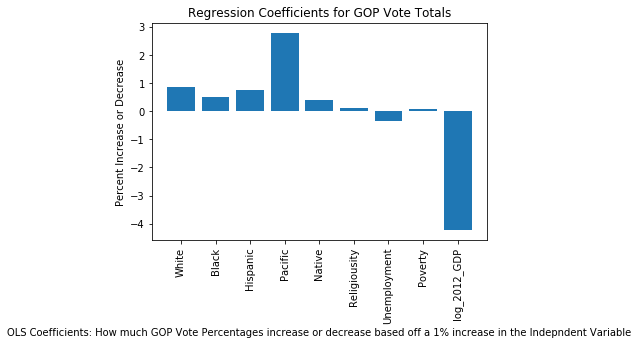

In [134]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], [0.87, 0.5, 0.77, 2.8, 0.4, .12, -.36, 0.1, -4.2414], 
        tick_label=['White', 'Black', 'Hispanic', 'Pacific', 'Native', 'Religiousity', 'Unemployment', 'Poverty','log_2012_GDP'])
plt.title('Regression Coefficients for GOP Vote Totals')
plt.xticks(rotation=90)
plt.ylabel('Percent Increase or Decrease')
plt.xlabel('OLS Coefficients: How much GOP Vote Percentages increase or decrease based off a 1% increase in the Indepndent Variable')
plt.show();

In [135]:
X = Analysis_File[["White", "Black", "Hispanic", "Asian", "Pacific", "Native", "Religiousity", 
                   "Unemployment", "Poverty", "log_2012_GDP"]]
y = Analysis_File["Percent of Vote (2012), DNC"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
##This model has high Auto-Correlation and breaks our Gauss Markoff assumptions. Will need to add a time value to improve the model and predictions.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Percent of Vote (2012), DNC   R-squared:                       0.921
Model:                                     OLS   Adj. R-squared:                  0.921
Method:                          Least Squares   F-statistic:                     3545.
Date:                         Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                                 22:09:09   Log-Likelihood:                -11820.
No. Observations:                         3058   AIC:                         2.366e+04
Df Residuals:                             3048   BIC:                         2.372e+04
Df Model:                                   10                                         
Covariance Type:                     nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
White            0.0627      0.025      2.522      0.012       0.014       0.111
Black            0.4473      0.035     12.828      0.000       0.379       0.516
Hispanic         0.1552      0.032      4.904      0.000       0.093       0.217
Asian            1.1066      0.130      8.480      0.000       0.851       1.362
Pacific         -0.5390      0.683     -0.789      0.430      -1.878       0.800
Native           0.5133      0.047     10.856      0.000       0.421       0.606
Religiousity    -0.1137      0.013     -8.775      0.000      -0.139      -0.088
Unemployment     0.3726      0.087      4.297      0.000       0.203       0.543
Poverty         -0.0805      0.048     -1.677      0.094      -0.175       0.014
log_2012_GDP     5.0917      0.362     14.076      0.000       4.382       5.801
==============================================================================
Omnibus:                      109.367   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.446
Skew:                           0.476   Prob(JB):                     7.01e-27
Kurtosis:                       3.195   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

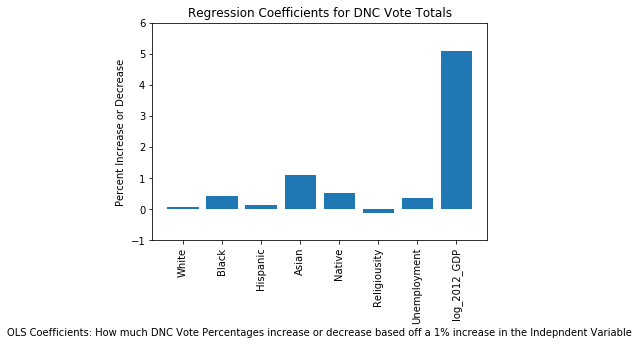

In [136]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8], [0.062, 0.44, 0.15, 1.1066, 0.51, -.1137, 0.37, 5.0917], 
        tick_label=['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Religiousity', 'Unemployment', 'log_2012_GDP'])
plt.title('Regression Coefficients for DNC Vote Totals')
plt.xticks(rotation=90)
plt.ylim(-1,6)
plt.xlabel('OLS Coefficients: How much DNC Vote Percentages increase or decrease based off a 1% increase in the Indepndent Variable')
plt.ylabel('Percent Increase or Decrease')
plt.show();

## Saving the File and Completion of Analysis
That completes the model building and analysis of what we have in this dataset. Our primary influencers are Demographic 
based off the data that we have. I will save the File now and build the presentation.

In [137]:
Analysis_File.to_csv('Analysis_File_Voting_Project.csv')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The observed relationships in this portion of the analysis started with the analysis of Geographic Vote Win (Number of Counties) versus the number of Votes actually won. This strengthened the observable value of Barack Obamas margin of victory and displayed through visuals what a map often shows. That Democrats tend to do well in high population areas and Republicans are more appealing in low population areas. The other set of interactions of Economic Indicators, Religion, and Demographic values combined provide a nice breakdown on correlation by party, but when combined in a model for Linear Regression they helped explain a significant amount of the variation in our data. 

> One value of interest, given 2016, was the coefficients for Hispanics with GOP vote percentages. At a p<.05 level we can see that there is an increase in GOP vote percentages, but I suspect that increase is unlikely in modern American Politics. 

### Were there any interesting or surprising interactions between features?

> So the interesting relationship came when building the visualizations and checking the correlations at the party level vote totals. Each re-enforced notions that we can see in political discussion, however the surprise came with the Regression Analysis. The high R-Squared combined with the statistical significance would seem to challenge several assumptions when drilling down on who the most valuable groups are to each party. Most interestingly it appears a bad economy benefits the GOP more than the DNC. This could be because as of 2012 the Party out of Power IRT the Presidency was the GOP, but without a timeseries analysis there is no way to be a hundred percent sure. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!